In [2]:
ColabNotebook = 'google.colab' in str(get_ipython())

if ColabNotebook:
    # monta G-drive en entorno COLAB
    from google.colab import drive
    drive.mount('/content/drive/')

    # carpeta donde se encuentran archivos .py auxiliares
    FUENTES_DIR = '/content/drive/MyDrive/Colab Notebooks/FUENTES/'
    DATOS_DIR = '/content/drive/MyDrive/Colab Notebooks/DATOS/'      # carpeta donde se encuentran los datasets
else:
    # configuración para notebook con instalación LOCAL
    FUENTES_DIR = '../Fuentes'         # carpeta donde se encuentran archivos .py auxiliares
    DATOS_DIR   = '../Datos/' # carpeta donde se encuentran los datasets

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

In [3]:
%matplotlib inline
import numpy as np
import time
#from matplotlib import pyplot as plt
from matplotlib import pylab as plt
from IPython import display

from grafica import *
# Ajustar el tamaño predeterminado de las figuras
plt.rcParams['figure.figsize'] = [4,3]

In [4]:
# Ejemplos de entrada de la función AND
X = np.array([[0,0], [0,1],[1,0],[1,1]])

#-- Respuesta esperada para cada ejemplo
T = np.array([0,0,0,1])

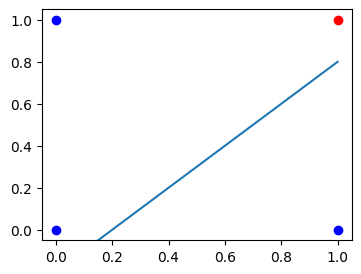

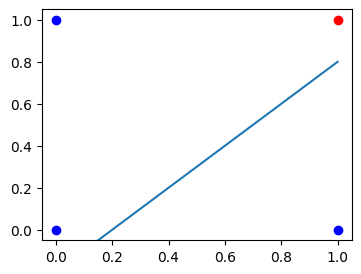

In [5]:
# -- PESOS INICIALES - Determinan la ubicación de la recta
W = np.array([-1.0, 1.0])
b = 0.2

print("W = ", W)
print("b = ", b)

dibuPtosRecta(X,T, W, b)

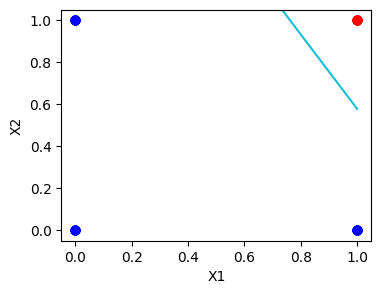

ite 10


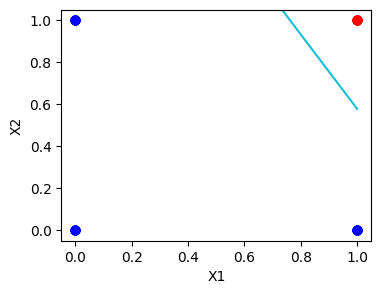

In [36]:
import time
# --- titulos y ph se utilizan sólo para dibujar ---
titulos = ['X1', 'X2']  # Nombres de los ejes (características) para graficar
ph = 0  # Variable utilizada para manejar la figura del gráfico

# --- parámetros del PERCEPTRON ---
MAX_ITE = 100  # Número máximo de iteraciones permitidas para el entrenamiento
alfa = 0.1  # Tasa de aprendizaje (learning rate) del perceptrón

# --- Los pesos iniciales son aleatorios ---
W = np.array(np.random.uniform(-0.5, 0.5, size=2))  # Inicializa los pesos con valores aleatorios entre -0.5 y 0.5
b = np.random.uniform(-0.5, 0.5)  # Inicializa el sesgo (bias) con un valor aleatorio entre -0.5 y 0.5

# --- al finalizar ERRORES debe contener la cantidad de cambios realizados en c/iteración ---
errores = []  # Lista para almacenar el número de errores (actualizaciones) en cada iteración

# --- Entrenamiento del PERCEPTRON ---
nCantEjemplos = X.shape[0]  # Número de ejemplos de entrenamiento (número de filas de X)
nAtrib = X.shape[1]         # Número de atributos/características por ejemplo (número de columnas de X)

ite = 0  # Contador de iteraciones
N_errores = 1  # Inicialización del contador de errores, se usa para controlar el bucle

# Bucle de entrenamiento que se ejecuta hasta que se cumpla una de las condiciones
while (ite < MAX_ITE) and (N_errores > 0):
    N_errores = 0  # Reinicia el contador de errores para la nueva iteración
    for e in range(nCantEjemplos):
        # Calcular y  (la salida del perceptrón)
        neta = W[0] * X[e, 0] + W[1] * X[e, 1] + b  # Calcula la entrada neta como combinación lineal de los pesos, los atributos y el sesgo
        ph = dibuPtosRecta(X, T, W, b, titulos, ph)  # Dibuja la recta de decisión y los puntos en el gráfico
        time.sleep(0.6)
        
        y = (neta > 0) * 1  # La salida es 1 si neta > 0, de lo contrario es 0 (función escalón)

        # Si no es correcta, corregir  W y b
        if (T[e] != y):  # Si la salida no coincide con la etiqueta real
            N_errores = N_errores + 1  # Incrementa el contador de errores
            W[0] = W[0] + alfa * (T[e] - y) * X[e, 0]  # Actualiza el peso asociado a la primera característica
            W[1] = W[1] + alfa * (T[e] - y) * X[e, 1]  # Actualiza el peso asociado a la segunda característica
            b = b + alfa * (T[e] - y)  # Actualiza el sesgo (bias)
    
    errores.append(N_errores)  # Guarda el número de errores (actualizaciones) en esta iteración
    # Graficar la recta con los puntos en el plano
    #ph = dibuPtosRecta(X, T, W, b, titulos, ph)  # Dibuja la recta de decisión y los puntos en el gráfico
    #time.sleep(0.6)
      
    ite = ite + 1  # Incrementa el contador de iteraciones
    print("ite %d" % ite)  # Imprime el número de iteración actual


In [30]:
print("W = ", W)
print("b = ", b)

W =  [0.27936912 0.15050787]
b =  -0.33941294986015064


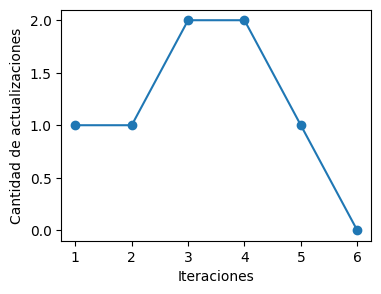

In [35]:
plt.plot(range(1, len(errores) + 1), errores, marker='o')
plt.xlabel('Iteraciones')
plt.ylabel('Cantidad de actualizaciones')
plt.show()